# Projet d'Analyse Boursière

### Remarque: Vous êtes libre de considérer ceci comme un exercice complet ou simplement de voir la vidéo des solutions comme une revue de code pour le projet. Ce projet est conçu pour être assez stimulant car il introduira quelques nouveaux concepts par le biais de quelques astuces !

Bienvenue à votre premier projet! Ce projet est destiné à couronner la première moitié du cours, qui a principalement porté sur l'apprentissage des bibliothèques que nous utilisons dans ce cours, la deuxième moitié du cours traitera beaucoup plus des techniques financières et des plateformes de trading quantitatif.

Nous analyserons les données sur les actions de quelques compagnies automobiles du 1er janvier 2012 au 1er janvier 2017. Gardez à l'esprit que ce projet est principalement fait pour pratiquer vos compétences avec matplotlib, pandas et numpy. Ne déduisez pas des conseils de trading financier de l'analyse que nous faisons ici !

### Partie 0: Importations

**Importez les différentes bibliothèques dont vous aurez besoin - vous pouvez toujours revenir ici ou importer au fur et à mesure :)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

____
## Partie 1: Obtenir les données

### Action Tesla (Ticker: TSLA sur le NASDAQ)

**Note ! Tout le monde ne travaillera pas sur un ordinateur qui lui donnera un accès complet pour télécharger les informations boursières en utilisant pandas_datareader (pare-feu, permissions d'administration, etc...). Pour cette raison, le fichier csv pour Tesla est fourni dans un dossier data à l'intérieur de ce dossier. Il s'appelle Tesla_Stock.csv. N'hésitez pas à l'utiliser avec read_csv !**

**Utilisez pandas_datareader pour obtenir les informations historiques sur les actions de Tesla du 1er janvier 2012 au 1er janvier 2017.**



In [2]:
import datetime

In [4]:
import pandas_datareader.data as web

In [5]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)
tesla = web.DataReader("TSLA", 'yahoo', start, end)

In [6]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


### Autres entreprises automobiles

**Répétez les mêmes étapes pour extraire les données pour Ford et GM (General Motors)**

In [7]:
ford = web.DataReader("F", 'yahoo', start, end)
gm = web.DataReader("GM",'yahoo',start,end)

In [8]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.687118
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.804530
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.004824
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.087703
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.149862


In [9]:
ford.to_csv('Ford_Stock.csv')

In [10]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712


In [11]:
gm.to_csv('GM_Stock.csv')

## Partie 2: Visualisation des données

**Il est temps de visualiser les données.**

**Suivez et recréez les graphiques ci-dessous en suivant les instructions et les explications.**

____

**Recréez ce tracé linéaire de tous les prix à l'ouverture des différentes actions! Astuce: Pour la légende, utilisez le paramètre label et plt.legend()**

In [12]:
# Code ici

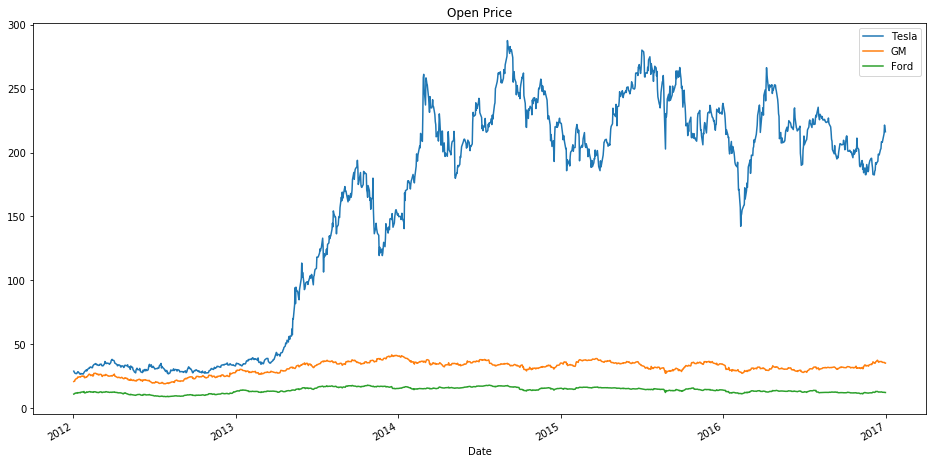

In [13]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

____

**Tracez le volume des actions négociées chaque jour.**

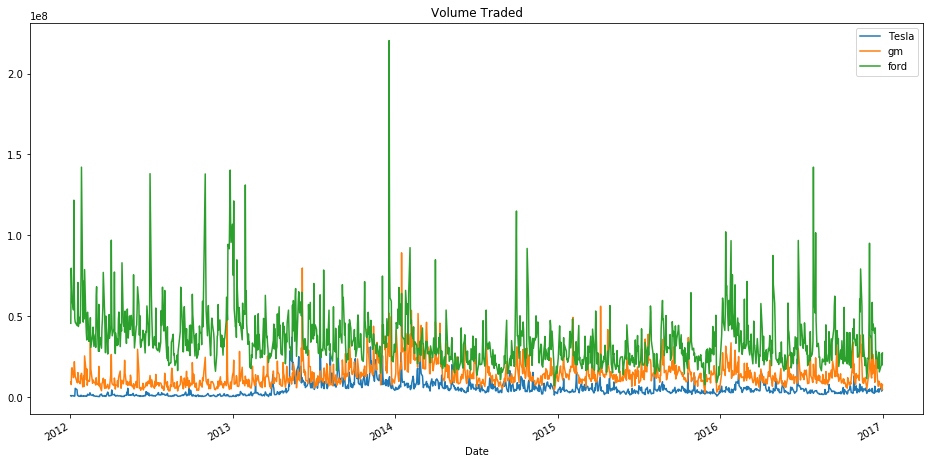

In [14]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

**Intéressant, il semble que Ford ait eu un très gros pic fin 2013. Quelle était la date de ce volume d'échange maximum pour Ford ?**

**Bonus: Que s'est-il passé ce jour-là?**

In [15]:
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

In [16]:
# Que s'est-il passé?
# http://money.cnn.com/2013/12/18/news/companies/ford-profit/
# https://www.usatoday.com/story/money/cars/2013/12/18/ford-2014-profit-warning/4110015/
# https://media.ford.com/content/dam/fordmedia/North%20America/US/2014/01/28/4QFinancials.pdf

____

*La visualisation du prix à l'ouverture des séries temporelles donne l'impression que Tesla a toujours eu beaucoup plus de valeur en tant qu'entreprise que GM et Ford. Mais pour vraiment comprendre cela, il faudrait regarder la capitalisation boursière totale de la société, et pas seulement le cours de l'action. Malheureusement, nos données actuelles n'ont pas cette information du nombre total d'unités d'actions présentes. Mais ce que nous pouvons faire comme simple calcul pour essayer de représenter l'argent total échangé serait de multiplier la colonne 'Volume' par le cours de l'action. Rappelez-vous que ce n'est pas encore la capitalisation boursière réelle, c'est juste une représentation visuelle de la quantité totale d'argent échangé en utilisant la série temporelle. (par exemple 100 unités d'actions à 10 dollars chacune contre 100 000 unités d'actions à 1 dollars chacune)*

**Créez une nouvelle colonne pour chaque dataframe appelée "Total Traded" qui est le prix d'ouverture multiplié par le volume négocié.**

In [17]:
# Code ici

In [18]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

**Tracez ce total négocié (Total Traded) par rapport à l'index de temps.**

In [19]:
# Code ici

Text(0, 0.5, 'Total Traded')

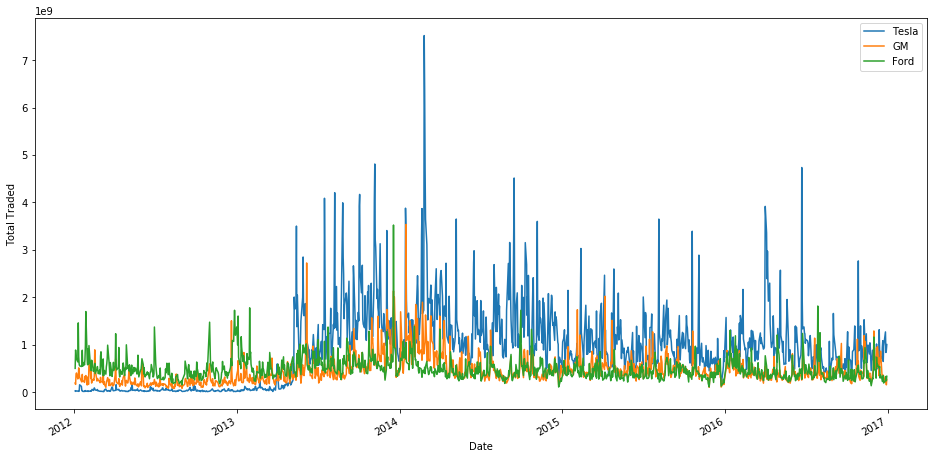

In [20]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

**Intéressant, il semble qu'il y ait eu une énorme quantité d'argent échangé pour Tesla début 2014. Quelle date c'était et que s'est-il passé ?**

In [21]:
tesla['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

In [22]:
# http://money.cnn.com/2014/02/25/investing/tesla-record-high/
# https://blogs.wsj.com/moneybeat/2014/02/25/tesla-shares-surge-on-morgan-stanley-report/
# https://www.washingtonpost.com/news/wonk/wp/2014/02/25/teslas-stock-is-up-644-why-it-may-not-last/
# http://www.cnbc.com/2014/02/25/tesla-soars-ford-falls-in-consumer-reports-study.html

____

**Entraînons-nous à tracer des moyennes glissantes ou mobiles (MA - Moving Averages). Tracez MA50 et MA200 pour GM.**

In [23]:
# Code ici

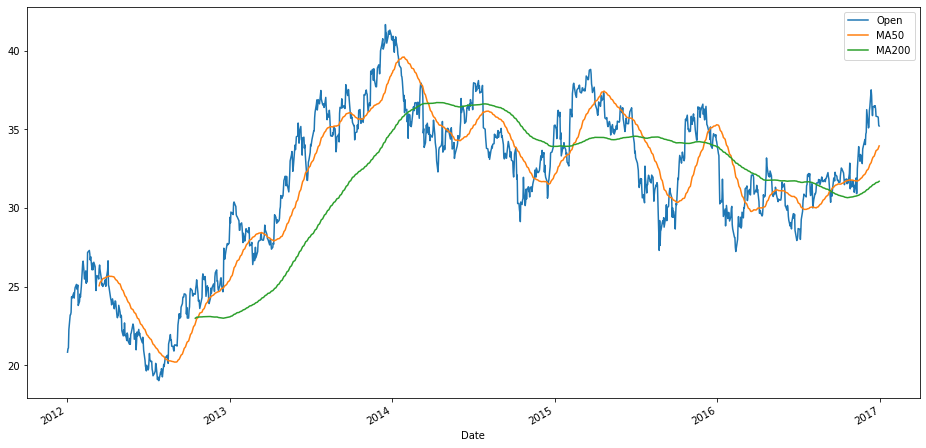

In [24]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

______

**Enfin, voyons s'il existe une relation entre ces actions car elles sont tous liées à l'industrie automobile. Nous pouvons le voir facilement à travers un diagramme de dispersion. Importez la matrice de dispersion de pandas.plotting et utilisez-la pour créer un diagramme de dispersion du prix d'ouverture de toutes les actions. Vous devrez peut-être réorganiser les colonnes dans un nouveau dataframe unique. Vous trouverez des conseils et des informations ici: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot**

In [25]:
from pandas.plotting import scatter_matrix

In [26]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [27]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

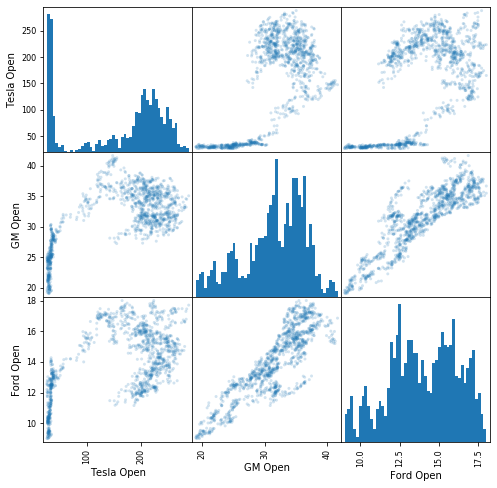

In [28]:
# Vous pouvez utiliser un point-virgule pour supprimer l'impression des axes
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

_____
### Bonus: Tâche de visualisation ! (C'est difficile !)
**Créons maintenant un graphique en chandelier! Regardez la vidéo si vous ne parvenez pas à recréer cette visualisation, il y a plusieurs étapes à suivre! Référez-vous à la vidéo pour comprendre comment interpréter et lire ce graphique. Conseils: https://matplotlib.org/examples/pylab_examples/finance_demo.html**

**Créer un graphique de chandeliers pour Ford en janvier 2012 (trop de dates, ce ne sera pas idéal pour un graphique de chandeliers)**

In [29]:
# Code ici

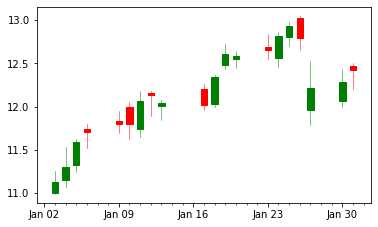

In [30]:
# from mpl_finance import candlestick_ohlc
# Maj mpl_finance devient mplfinance - pip install --upgrade mplfinance 
from mplfinance.original_flavor import candlestick_ohlc

from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Réinitialiser l'index pour obtenir une colonne des dates de janvier
ford_reset = ford.loc['2012-01':'2012-01'].reset_index()

# Créer une nouvelle colonne de valeurs numériques de "date" à utiliser par matplotlib
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY) # major ticks on the mondays
alldays = DayLocator() # minor ticks on the days
weekFormatter = DateFormatter('%b %d') # e.g., Jan 12
dayFormatter = DateFormatter('%d') # e.g., 12

# Tracé
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, ford_values, width=0.6, colorup='g',colordown='r');

____
# Partie 3: Analyse financière de base

Il est maintenant temps de se concentrer sur quelques calculs financiers clés. Cela vous servira de transition vers la deuxième moitié du cours. Vous n'avez qu'à suivre les instructions, il s'agira principalement d'un exercice de conversion d'une équation ou d'un concept mathématique en code à l'aide de python et pandas, ce que nous ferons souvent lorsque nous travaillerons avec des données quantitatives! Si vous vous sentez perdu dans cette section, ne vous inquiétez pas! Allez simplement au notebook (ou vidéo) sur les solutions et traitez-la comme une revue de code, utilisez le style d'apprentissage qui vous convient le mieux!

Commençons !
____

## Rendement quotidien en pourcentage
Nous commencerons par calculer la rendement quotidienne en pourcentage. Le rendement (en %) est défini par la formule suivante :

$ r_t = \frac{p_t}{p_{t-1}} -1$

Cela définit r_t (rendement à l'instant t) comme étant égal au prix à l'instant t divisé par le prix à l'instant t-1 (la veille) moins 1. En gros, cela vous informe simplement de votre pourcentage de gain (ou de perte) si vous avez acheté l'action le jour et l'avez ensuite vendue le lendemain. Bien que cela ne soit pas nécessairement utile pour tenter de prédire les valeurs futures du titre, c'est très utile pour analyser la volatilité du titre. Si les rendements quotidiens ont une large distribution, le titre est plus volatil d'un jour à l'autre. Calculons les pourcentages de rendement, puis traçons un histogramme et décidons quel titre est le plus stable!

**Créez une nouvelle colonne pour chaque dataframe appelée 'returns'. Cette colonne sera calculée à partir de la colonne de prix à la fermeture'Close'. Il y a deux façons de faire cela, soit un simple calcul en utilisant la méthode .shift() qui suit la formule ci-dessus, ou vous pouvez aussi utiliser la méthode pct_change intégrée à pandas.**

In [31]:
# Méthode 1: en utilisant shift
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [32]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635


In [33]:
# méthode 2: en utilisant pct_change
tesla['returns'] = tesla['Close'].pct_change(1)

In [34]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635


In [35]:
# répéter pour les autres dataframes
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [36]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.687118,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.804530,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.004824,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.087703,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.149862,6.386011e+08,0.007686


In [37]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352,1.941627e+08,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853,1.653835e+08,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161,3.772807e+08,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915,4.059000e+08,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712,2.803604e+08,NaN,NaN,-0.003490


**Maintenant, tracez un histogramme des rendements de chaque entreprise. Soit vous les faites séparément, soit vous les empilez les uns sur les autres. Quelle est l'action la plus "volatile"? (selon la variance des rendements quotidiens, nous discuterons de la volatilité de façon beaucoup plus détaillée dans les prochaines sections).**

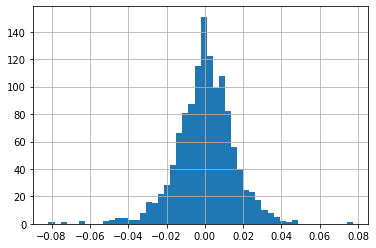

In [38]:
ford['returns'].hist(bins=50)

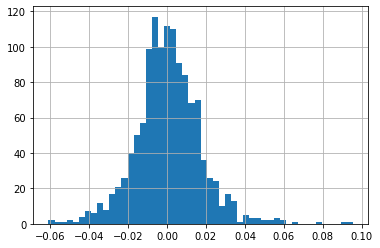

In [39]:
gm['returns'].hist(bins=50)

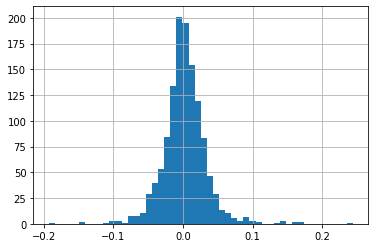

In [40]:
tesla['returns'].hist(bins=50)

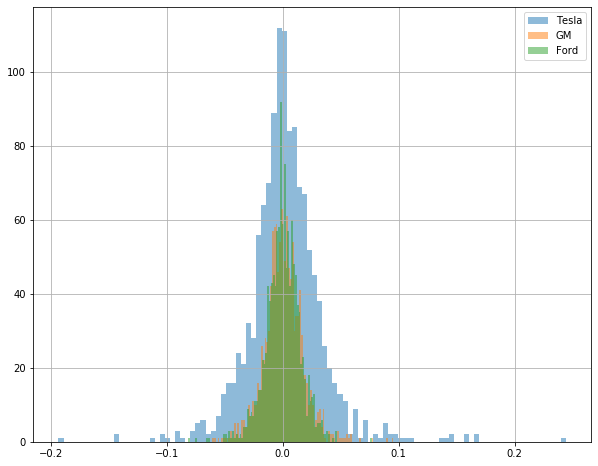

In [41]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

**Essayez aussi de tracer un KDE au lieu dun 'histogrammes pour avoir un autre point de vue. Quelle action a le tracé le plus large?**

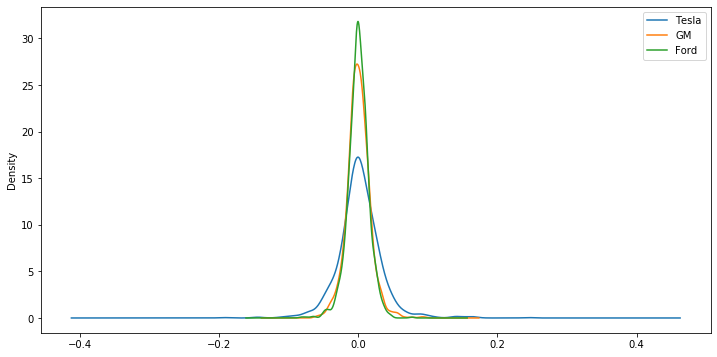

In [42]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

**Essayez aussi de créer des diagrammes en boîtes comparant les rendements.**

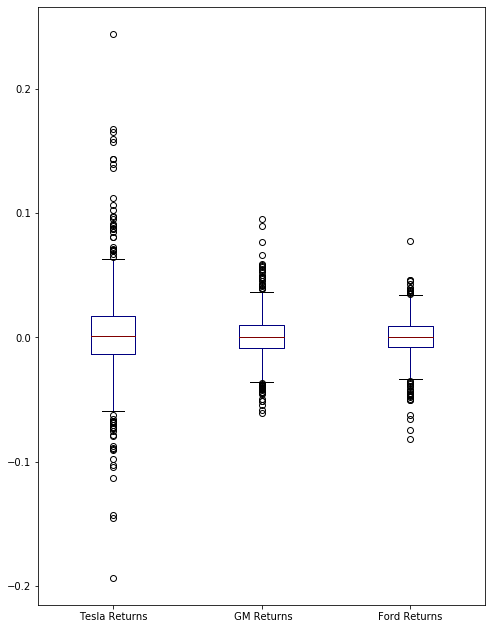

In [43]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

## Comparaison des rendements quotidiens entre les actions

**Créez un graphique matriciel de dispersion pour voir la corrélation entre les rendements quotidiens de chaque titre. Cela permet de répondre à la question de savoir dans quelle mesure les sociétés automobiles sont liées entre elles. Le marché considère-t-il Tesla comme une entreprise de technologie plutôt que comme une entreprise automobile ?**

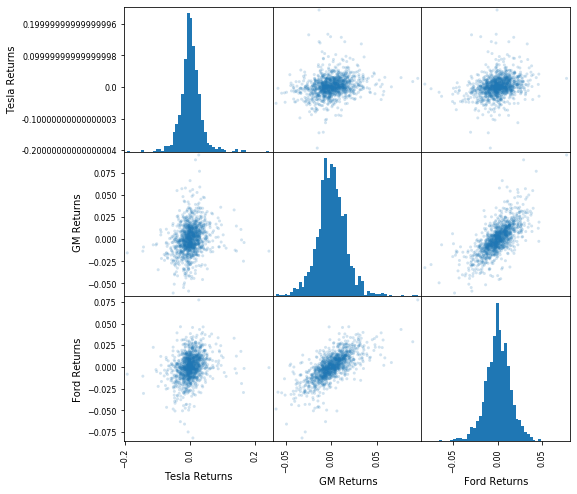

In [44]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

**Il semble que Ford et GM aient une sorte de relation, traçons juste ces deux-là dans un diagramme de dispersion pour voir cela de plus près !**

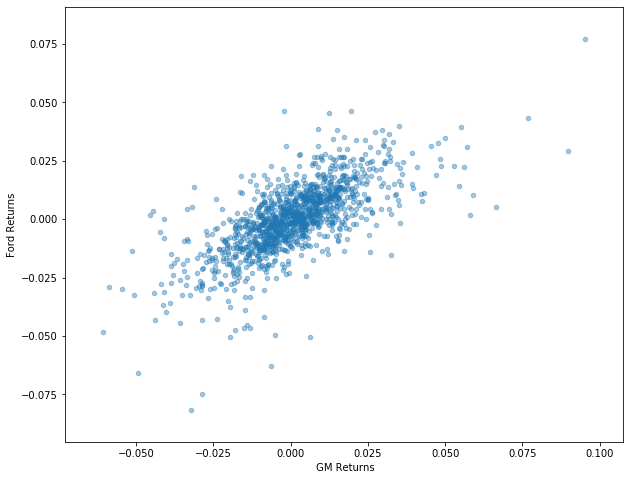

In [45]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

____
## Rendements quotidiens cumulatifs

Super ! Nous pouvons maintenant voir quel titre a eu le plus grand écart de rendement quotidien (vous auriez dû vous rendre compte que c'était Tesla, notre graphique original du cours de l'action aurait dû aussi le montrer).

Avec les rendements cumulatifs quotidiens, la question à laquelle nous essayons de répondre est la suivante: si j'avais investi 1$ dans l'entreprise au début de la série temporelle, combien vaudrait-elle aujourd'hui? Cette question est différente de celle du prix de l'action à la journée courante, car elle tiendra compte des rendements quotidiens. N'oubliez pas que notre simple calcul ici ne tiendra pas compte des actions qui redonnent un dividende. Examinons quelques exemples simples:

Disons qu'il y a une action "ABC" qui est activement négociée en bourse. ABC a les prix suivants correspondant aux dates indiquées:

    Date                        Prix
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Rendement quotidien**: Le rendement quotidien est le profit ou perte réalisé par l'action par rapport à la veille. (C'est ce qu'on vient de calculer ci-dessus). Une valeur supérieure à 1 indique un profit, de même qu'une valeur inférieure à 1 indique une perte. Il est également exprimé en pourcentage pour mieux transmettre l'information. (Exprimé en pourcentage, si la valeur est supérieure à 0, le titre vous a donné un profit, sinon une perte). Ainsi, pour l'exemple ci-dessus, les rendements quotidiens seraient

    Date                 Rendement quotidien      %Rendement quotidien
    01/01/2018               10/10 =  1                      -   
    01/02/2018               15/10 =  3/2                    50%
    01/03/2018               20/15 =  4/3                    33%
    01/04/2018               25/20 =  5/4                    20%

**Rendement Cumulé**: Bien que les rendements quotidiens soient utiles, ils ne donnent pas à l'investisseur un aperçu immédiat des gains qu'il a réalisés jusqu'à présent, surtout si le titre est très volatil. Le rendement cumulatif est calculé par rapport au jour où l'investissement est effectué.  Si le rendement cumulatif est supérieur à 1, vous faites des profits, sinon vous êtes en perte. Donc, pour l'exemple ci-dessus, les gains cumulatifs sont les suivants:

    Date                Rendement cumulé         %rendement cumulé
    01/01/2018              10/10 =  1               100 %   
    01/02/2018              15/10 =  3/2             150 %
    01/03/2018              20/10 =  2               200 %
    01/04/2018              25/10 =  5/2             250 %

La formule pour un rendement quotidien cumulatif est la suivante :

$ i_i = (1+r_t) * i_{t-1} $

Ici, nous pouvons voir que nous ne faisons que multiplier notre investissement précédent à i à t-1 par 1+notre pourcentage de rendement. Pandas rend cela très simple à calculer avec sa méthode cumprod(). En utilisant quelque chose de la manière suivante :

    df[daily_cumulative_return] = (1 + df[pct_daily_return]).cumprod()
    

**Créez une colonne de rendement quotidien cumulatif (cumulative daily return) pour le dataframe de chaque société automobile.**

In [46]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [47]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,NaN
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,-0.013177,0.986823
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,-0.021292,0.965812
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,-0.007743,0.958333
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,0.012635,0.970442


In [48]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

**Tracez maintenant les colonnes de rendement cumulatif en fonction de l'index de la série temporelle. Quel titre a affiché le rendement le plus élevé pour un dollar investi? Lequel a affiché le rendement le plus faible?**

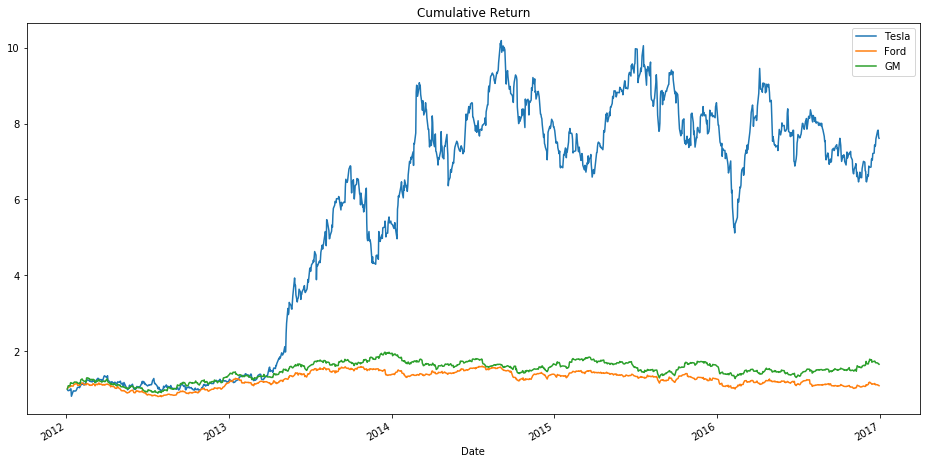

In [49]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()

# Bon travail!

Voilà pour l'analyse de base, qui conclut cette moitié du cours, beaucoup plus axée sur l'apprentissage des outils du métier. La deuxième moitié du cours est celle où nous nous plongerons vraiment dans les fonctionnalités conçues pour les séries temporelles, l'analyse quantitative, le trading algorithmique, et bien plus encore!